# Assignment 2 - Find complex answers to medical questions

In this assignment we will work on a task of "query-focused summarisation" on medical questions where the goal is, given a medical question and a list of sentences extracted from relevant medical publications, to determine which of these sentences from the list can be used as part of the answer to the question.

We will use data that has been derived from the **BioASQ challenge** (http://www.bioasq.org/), after some data manipulation to make it easier to process for this assignment. The BioASQ challenge organises several "shared tasks", including a task on biomedical semantic question answering which we are using here. The data are in the file `bioasq10_labelled.csv`, which is part of the zip file provided. Each row of the file has a question, a sentence text, and a label that indicates whether the sentence text is part of the answer to the question (1) or not (0).

The following code uses pandas to store the file `bioasq10_labelled.csv` in a data frame and show the first rows of data. For this code to run, first you need to unzip the file `data.zip`:

In [4]:
!unzip data.zip

unzip:  cannot find or open data.zip, data.zip.zip or data.zip.ZIP.


In [1]:
import pandas as pd
dataset = pd.read_csv("bioasq10b_labelled.csv")
dataset.head()

FileNotFoundError: [Errno 2] No such file or directory: 'bioasq10b_labelled.csv'

The columns of the CSV file are:

* `qid`: an ID for a question. Several rows may have the same question ID, as we can see above.
* `sentid`: an ID for a sentence.
* `question`: The text of the question. In the above example, the first rows all have the same question: "Is Hirschsprung disease a mendelian or a multifactorial disorder?"
* `sentence text`: The text of the sentence.
* `label`: 1 if the sentence is a part of the answer, 0 if the sentence is not part of the answer.

# Task 1 (5 marks): Data preparation

Partition the data into the training, dev_test, and test sets using the proportions 6:2:2. That is, 60% of the questions must be in the training set, 20% must be in the dev_test set, and the remaining 20% in the test set. Make sure that you partition based on the questions, not on the rows. With this we mean that all the sentences related to a question must be in one file only. In other words, there must not be sentences from the same question in, say, the training and the test data.

Also, make sure that you implement a random partition.

Save the partitions as the files `training.csv`, `dev_test.csv`, and `test.csv`, so that they can be used by other people.

The breakdown of marks is as follows:

* **1 mark** if your explanation answers the following question correctly: Why do we want to split the partition on the questions, and not on the rows?
* **1 mark** if the code partitions the data on the questions randomly and according to the split 6:2:2.
* **1 mark** if your code generates partitions that have similar balance of labels and you demonstrate that they are similar.
* **1 mark** if the partitions are saved as the CSV files `training.csv`, `dev_test.csv`, and `test.csv`.
* **1 mark** for good coding and documentation in this task.


In [3]:
#Randomly shuffling the questions before partitioning the data to implement a random partition.
import random
random.seed(1234)
questions = list(set(dataset['qid']))
random.shuffle(questions)

In [5]:
#Partitioning the data on the questions into training, dev_test and test sets using the proportions 6:2:2.
from sklearn.model_selection import train_test_split
train, test = train_test_split(questions, random_state=42, test_size=0.60)
train, devtest = train_test_split(train, random_state=42, test_size=0.20)
print("Training size:", len(train))
print("Devtest size:", len(devtest))
print("Test size:", len(test))

Training size: 1354
Devtest size: 339
Test size: 2541


We want to split the partition on the questions, and not on the rows to ensure that sentences from the same question aren't in the same data sets. Ensuring this segregation is important to prevent the model from overfitting and accurately evaluate the model. 

In [6]:
#Creating the training data set.
training_set = []
for d in train:
    question_data = dataset[dataset['qid'] == d]
    training_set += list(question_data.itertuples(index=False, name=None))
train = pd.DataFrame(training_set,columns = ['qid','sentid','question','sentence text','label'])
train.head()

,qid,sentid,question,sentence text,label
0,1320,0,Which disease is linked to mutations within BR...,Mutations in BRAG1 have been identified in fam...,1
1,3106,0,Which tool is used to visualise the junction s...,IRscope: an online program to visualize the ju...,1
2,3106,1,Which tool is used to visualise the junction s...,"Here, we announce a new visualization tool tha...",0
3,3106,2,Which tool is used to visualise the junction s...,It allows the users to depict the genetic arch...,1
4,3106,3,Which tool is used to visualise the junction s...,The software and its dependent libraries are f...,1


In [ ]:
#Saving the training partitioned data as a CSV file. 
train.to_csv('training.csv', index=False)

In [7]:
#Creating the dev_test data set.
devtest_set = []
for d in devtest:
    question_data = dataset[dataset['qid'] == d]
    devtest_set += list(question_data.itertuples(index=False, name=None))
devtest = pd.DataFrame(devtest_set,columns = ['qid','sentid','question','sentence text','label'])
devtest.head()

,qid,sentid,question,sentence text,label
0,2043,0,What is the link between Ctf4 and Chl1 in cohe...,Ctf4 Links DNA Replication with Sister Chromat...,0
1,2043,1,What is the link between Ctf4 and Chl1 in cohe...,"The Eco1 acetyltransferase, helped by factors ...",0
2,2043,2,What is the link between Ctf4 and Chl1 in cohe...,Here we show that Ctf4 recruits the Chl1 helic...,0
3,2043,3,What is the link between Ctf4 and Chl1 in cohe...,The Chl1 helicase facilitates replication fork...,0
4,2043,4,What is the link between Ctf4 and Chl1 in cohe...,"Conversely, Ctf4 interaction, but not helicase...",0


In [ ]:
#Saving the dev_test partitioned data as a CSV file. 
devtest.to_csv('devtest.csv', index=False)

In [8]:
#Creating the test data set.
test_set = []
for d in test:
    question_data = dataset[dataset['qid'] == d]
    test_set += list(question_data.itertuples(index=False, name=None))
test = pd.DataFrame(test_set,columns = ['qid','sentid','question','sentence text','label'])
test.head()

,qid,sentid,question,sentence text,label
0,2451,0,Can multiple myeloma patients develop hypervis...,Multiple myeloma (MM) is an immedicable malign...,0
1,2451,1,Can multiple myeloma patients develop hypervis...,This skin condition may be observed in patient...,0
2,2451,2,Can multiple myeloma patients develop hypervis...,A 73-year-old woman with known MM who receive...,0
3,2451,3,Can multiple myeloma patients develop hypervis...,After a comprehensive evaluation ruled out co...,0
4,2451,4,Can multiple myeloma patients develop hypervis...,"Lab results showed monoclonal gammopathy, elev...",0


In [ ]:
#Saving the test partitioned data as a CSV file. 
test.to_csv('test.csv', index=False)

0    14465
1     6100
Name: label, dtype: int64


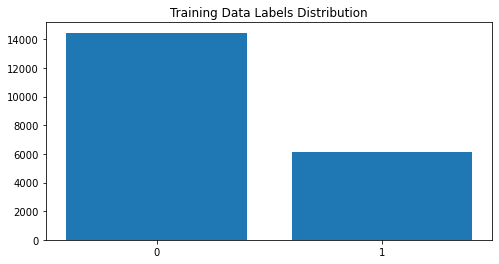

In [54]:
#Plotting the distribution of labels in each partition to assess whether there is a similar balance of labels. 
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt

#Training data labels distribution
labels = ['0','1']
label_counts = train['label'].value_counts()
print(label_counts)
label_counts.tolist()

plt.figure(figsize=(8,4))
plt.bar(range(2), label_counts)
plt.xticks(range(2), labels)
plt.title('Training Data Labels Distribution')
plt.show()

0    3468
1    1537
Name: label, dtype: int64


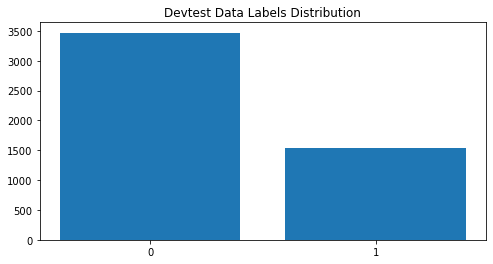

In [55]:
#Dev_test data labels distribution
labels = ['0','1']
label_counts = devtest['label'].value_counts()
print(label_counts)
label_counts.tolist()

plt.figure(figsize=(8,4))
plt.bar(range(2), label_counts)
plt.xticks(range(2), labels)
plt.title('Dev_test Data Labels Distribution')
plt.show()

0    27066
1    11476
Name: label, dtype: int64


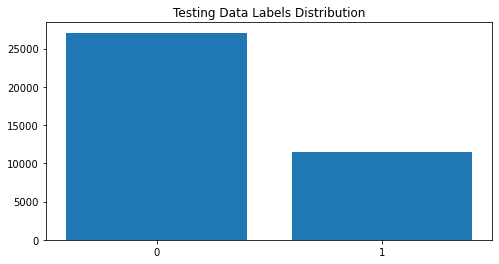

In [56]:
#Test data labels distribution
labels = ['0','1']
label_counts = test['label'].value_counts()
print(label_counts)
label_counts.tolist()

plt.figure(figsize=(8,4))
plt.bar(range(2), label_counts)
plt.xticks(range(2), labels)
plt.title('Test Data Labels Distribution')
plt.show()

From assessing the distributions of the training, dev_test and train data labels based on the histograms generated above, it can be concluded that the code has generated partitions that have similar balance of labels.

# Task 2 (5 marks): Cosine similarity

Use the files `training.csv`, `dev_test.csv`, and `test.csv` provided by us in the file `data.zip` (so that any possible errors that you may have introduced in task 1 do not propagate to this task and following tasks).

Implement a simple text summariser that is based on the cosine similarity between the question and the text. Use the following function signature.

```{python}
def cosine_summariser(csvfile, questionids, n=5):
   """Return the IDs of the n sentences that have the highest cosine similarity
    with the question. The input questionids is a list of question ids. The 
    output is a list of lists of sentence ids
    >>> cosine_summariser('test.csv', [3, 11], 3)
    [[3, 1, 4], [12, 4, 13]]"""

```

To obtain the text vectors, use sklearn's tf.idf libraries this way:

* Use all the defaults from the TfidfVectorizer instance, except for `stop_words="english"` and `max_features=10000`. The latter option will restrict the vocabulary size to 10,000. This will speed up the computations and reduce the memory footprint in the subsequent tasks.
* Use the `fit` method on the text of `training.csv`. In your documentation, please explain and justify what decision choices you made to select the correct text: would you use the question text only, the sentence text, or both?

Evaluate the summariser by reporting the mean F1 score on each of the three CSV files `training.csv`, `devtest.csv`, and `test.csv`, for $n=5$. To calculate the mean F1 score, do this:

1. For each question ID in the file, calculate the F1 score by comparing the result of your cosine summariser and the given labels. Feel free to use sklearn's functions to compute the F1 score, or implement your own version of the F1 scoring function if you prefer.
2. Calculate the mean of the F1 scores calculated in step 1.

Find the value of $n$ that returns the highest mean F1 score on the dev_test data.

The breakdown of marks is as follows:

* **1 mark** if the code generates the tf.idf vectors correctly. The explanations that justify the decisions made are reasonable. In particular, explain and justify what information you used to fit tf.idf.
* **1 mark** if the code calculates cosine similarity correctly.
* **1 mark** if the code returns the IDs of the $n$ sentences that have the highest cosine similarity with the question.
* **1 mark** if the notebook reports the F1 scores of the dev_test file and identifies the value of $n$ that gives the highest score on the dev_test file.
* **1 mark** for good coding and documentation in this task. In particular, comment on the reason why you think the value of $n$ that gives highest F1 has that value.

## Cosine Summariser

In [ ]:
def cosine_summariser(csvfile, questionids, n=5):
   """Return the IDs of the n sentences that have the highest cosine similarity
    with the question. The input questionids is a list of question ids. The 
    output is a list of lists of sentence ids
    >>> cosine_summariser('test.csv', [3, 11], 3)
    [[3, 1, 4], [12, 4, 13]]"""

In [59]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

training = pd.read_csv('training.csv')
test = pd.read_csv('test.csv')

tfidf = TfidfVectorizer(stop_words="english", max_features=10000)
sentences = training.to_dict()
tfidf.fit([sentences['sentence text'][k] for k in sentences['sentence text']])

results = []
results_scores = []
results_worst = 1

questions = dataset[['qid','question']].set_index('qid').to_dict()
query_vector = tfidf.transform([questions['question'][3]]).toarray()[0]

searchquestion = dataset[['qid','sentence text','sentid']]
querytable = searchquestion.loc[searchquestion['qid'] == 3]
querysentences = querytable[['sentid','sentence text']].set_index('sentid').to_dict()

for d in list(querysentences['sentence text']):
    d_vector = tfidf.transform([querysentences['sentence text'][d]]).toarray()[0]
    score = np.dot(query_vector, d_vector) # Formula for cosine similarity.
    if len(results) < 3:
        results.append(d)
        results_scores.append(score)
        results_worst = np.min((results_worst, score))
        continue
    if score > results_worst:
        i = np.argmin(results_scores)
        results_scores[i] = score
        results[i] = d
        results_worst = np.min(results_scores)
print(results_scores)
sorted(results, key=lambda x: results_scores[results.index(x)], reverse=True)

[0.20635877195638314, 0.2367318781278158, 0.24868556185217777]


[3, 1, 4]

In [98]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

training = pd.read_csv('training.csv')
test = pd.read_csv('test.csv')
tfidf = TfidfVectorizer(stop_words="english", max_features=10000)
sentences = training[['qid','sentence text']]
data = sentences.groupby('qid')['sentence text'].apply(list).reset_index().to_dict()
tfidf.fit(''.join(data['sentence text'][k]) for k in data['sentence text']) 

results = []
results_scores = []
results_worst = 1

questionquery = test[['qid','question']].drop_duplicates().reset_index()
query_vector = tfidf.transform([questionquery['question'][3]]).toarray()[0]

searchquestion = test[['qid','sentence text','sentid']]
qidno = questionquery['qid'][3]
querytable = searchquestion.loc[searchquestion['qid'] == qidno]
querysentences = querytable[['sentid','sentence text']].set_index('sentid').to_dict()

for d in list(querysentences['sentence text']):
    d_vector = tfidf.transform([querysentences['sentence text'][d]]).toarray()[0]
    score = np.dot(query_vector, d_vector) # Formula for cosine similarity.
    if len(results) < 3:
        results.append(d)
        results_scores.append(score)
        results_worst = np.min((results_worst, score))
        continue
    if score > results_worst:
        i = np.argmin(results_scores)
        results_scores[i] = score
        results[i] = d
        results_worst = np.min(results_scores)
print(results_scores)
sorted(results, key=lambda x: results_scores[results.index(x)], reverse=True)

10000
[0.43929012887186486, 0.13610524485755113, 0.22534032387489977]


[0, 4, 1]

**explain and justify what decision choices you made to select the correct text**
To select the correct text, the 
question text only, the sentence text, or both
was used 

## Evaluating the Cosine Summariser

In [ ]:
#calculating the F1 score for each question ID by comparing the result of the cosine summariser and the given labels. 
from sklearn.metrics import f1_score
train_tfidf = tfidf.transform()
train_labels = training['label']
tfidf.fit(train_tfidf, train_labels)
train_predictions = tfidf.predict(train_tfidf)
train_f1 = f1_score(train_labels, train_predictions)
print("Training F1 =", train_f1)
#
devtest_tfidf = tfidf.transform()
devtest_labels = devtest['label']
devtest_predictions = tfidf.predict(devtest_tfidf)
devtest_f1 = f1_score(devtest_labels, devtest_predictions)
print("Devtest F1 =", devtest_f1)
#
test_tfidf = tfidf.transform()
test_labels = test['label']
test_predictions = tfidf.predict(test_tfidf)
test_f1 = f1_score(test_labels, test_predictions)
print("Test F1 =", test_f1)

In [ ]:
#Calculating the mean of the F1 scores calculated for the three files

In [ ]:
#Finding the value of 𝑛 that returns the highest mean F1 score on the dev_test data
#Why you think the value of  𝑛  that gives highest F1 has that value.

# Task 3 (5 marks): Simple NN

Use the files `training.csv`, `dev_test.csv`, and `test.csv` provided by us.

Implement a simple TensorFlow-Keras neural model that has the following sequence of layers:

1. An input layer that will accept the tf.idf of the sentence text (we will ignore the question text in this task). Use the TfidfVectorizer instance that you have fitted in task 2.
2. A hidden layer and a relu activation function. You need to determine the size of the hidden layer.
3. An output layer with one cell. The output layer will classify the input text (binary classification).

Train the model with the training data and use the dev_test set to determine a good size of the hidden layer. 

With the model that you have trained, and implement a summariser that returns the $n$ sentences with highest predicted score. Use the following function signature:

```{python}
def nn_summariser(csvfile, questionids, n=5):
   """Return the IDs of the n sentences that have the highest predicted score. The input questionids is a list of question ids. The 
    output is a list of lists of sentence ids
    >>> cosine_summariser('test.csv', [3, 11], 3)
    [[2, 1, 3], [7, 14, 10]]"""

```

Report the final results using the test set. Remember: use the test set to report the final results of the best system only.

Based on your experiments, comment on whether this system is better than the system developed in task 2. To make this task less time-consuming, focus only on $n=5$.

The breakdown of marks is as follows:

* **1 mark** if the NN model has the correct layers, the correct activation functions, and the correct loss function.
* **1 mark** if the code passes the tf.idf information of the text to the model correctly.
* **1 mark** if the code returns the IDs of the $n$ sentences that have the highest prediction score in the given question.
* **1 mark** if the notebook reports the F1 scores of the test sets and comments on the results.
* **1 mark** for good coding and documentation in this task. In particular, the code and results must include evidence that shows your choice of best size of the hidden layer. The explanations must be clear and concise. To make this task less time-consuming, use $n=5$.

## Simple TensorFlow-Keras Neural Model

In [40]:
import tensorflow as tf
import numpy as np
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
tfidf = TfidfVectorizer(stop_words="english", max_features=10000)

training = pd.read_csv('training.csv')
trainsentences = training['sentence text'].to_dict()
training_tfidf = tfidf.fit_transform(testsentences[k] for k in testsentences)
training_labels = training['label']

devtest = pd.read_csv('dev_test.csv')
devtestsentences = devtest['sentence text'].to_dict()
devtest_tfidf = tfidf.fit_transform(devtestsentences[k] for k in devtestsentences)
devtest_labels = devtest['label']

In [53]:
from tensorflow.keras import models, layers
#Defining the model
SimpleNNModel = models.Sequential()
SimpleNNModel.add(layers.Dense(input_shape=len(tidf.get_features_names())))
SimpleNNModel.add(layers.Dense(5, activation='relu'))
SimpleNNModel.add(layers.Dense(1, activation='sigmoid'))
SimpleNNModel.summary()

In [54]:
SimpleNNModel.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [36]:
history = SimpleNNModel.fit(training_tfidf, np.array(training_labels),
                    epochs=10,
                    batch_size=32,
                    validation_data=(devtest_tfidf, np.array(devtest_labels)))

1


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
plt.clf()   # clear figure
acc_values = history.history['binary_accuracy']
val_acc_values = history.history['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
#Train the model with the training data and use the dev_test set to determine a good size of the hidden layer.
#Evidence to support the size of the hidden layer selected. 

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('test_accuracy:', test_accuracy)

## Text Summariser with the Trained Simple NN Model

In [ ]:
def nn_summariser(csvfile, questionids, n=5):
   """Return the IDs of the n sentences that have the highest predicted score. The input questionids is a list of question ids. The 
    output is a list of lists of sentence ids
    >>> cosine_summariser('test.csv', [3, 11], 3)
    [[2, 1, 3], [7, 14, 10]]"""

## Evaluating the Model

In [ ]:
#Report the final results using the test set. Remember: use the test set to report the final results of the best system only.
#Comments on the results
#Based on your experiments, comment on whether this system is better than the system developed in task 2. To make this task less time-consuming, focus only on  𝑛=5 .

In [ ]:
training_f1 = f1_score(np.array(training_labels)[:,i], training_predicted_labels[:, i])
print("Training F1 =", training_f1)
devtest_f1 = f1_score(np.array(devtest_labels)[:,i], devtest_predicted_labels[:, i])
print("Devtest F1 =", devtest_f1)
test_f1 = f1_score(np.array(test_labels)[:,i], test_predicted_labels[:, i])
print("Test F1 =", test_f1)

In [27]:
#decoding the tokenised data back to text
inverted_word_index = dict((i, w) for w, i in tokenizer.word_index.items())
sample_indices = tokenizer.texts_to_sequences([trainsentences[0]])
print(sample_indices)
" ".join([inverted_word_index[x] for x in sample_indices[0]])

[[2, 42, 15, 9, 22, 23, 29, 308, 27, 42, 15, 9, 13, 3, 50, 141]]


'the epidermal growth factor receptor egfr ligands such as epidermal growth factor egf and amphiregulin areg'

# Task 4 (5 marks): Recurrent NN

Use the files `training.csv`, `dev_test.csv`, and `test.csv` provided by us.

Implement a more complex neural network that is composed of the following layers:

* An embedding layer that generates embedding vectors of the sentence text with 35 dimensions.
* A LSTM layer. You need to determine the size of this LSTM layer, and the text length limit (if needed).
* The final output layer with one cell for binary classification, as in task 3.

Train the model with the training data, use the dev_test set to determine a good size of the LSTM layer and an appropriate length limit (if needed), and report the final results using the test set. Again, remember to use the test set only after you have determined the optimal parameters of the LSTM layer.

Based on your experiments, comment on whether this system is better than the systems developed in the previous tasks.

The breakdown of marks is as follows:

* **1 mark** if the NN model has the correct layers, the correct activation functions, and the correct loss function.
* **1 mark** if the code passes the sentence text to the model correctly. The documentation needs to explain what decisions had to be made to process long sentences. In particular, did you need to truncate the input text, and how did you determine the length limit?
* **1 mark** if the code returns the IDs of the *n* sentences that have the highest prediction score in the given question.
* **1 mark** if the notebook reports the F1 scores of the test sets and comments on the results.
* **1 mark** for good coding and documentation in this task. In particular, the code and results must include evidence that shows your choice of best size of the LSTM layer. The explanations must be clear and concise. To make this task less time-consuming, use $n=5$.

## Recurrent Neural Network Model

In [43]:
#vectorizing the sentences of the train data
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words=10000, oov_token="[UNK]")

training = pd.read_csv('training.csv')
trainsentences = training['sentence text'].to_dict()
tokenizer.fit_on_texts(trainsentences[k] for k in trainsentences)
train_data = tokenizer.texts_to_sequences(trainsentences[k] for k in trainsentences)

devtest = pd.read_csv('dev_test.csv')
devtestsentences = devtest['sentence text'].to_dict()
tokenizer.fit_on_texts(devtestsentences[k] for k in devtestsentences)
test_data = tokenizer.texts_to_sequences(devtestsentences[k] for k in devtestsentences)

In [ ]:
#Determining the text length limit for the LSTM layer by examining the distributions of sentences in the training set
#what decisions had to be made to process long sentences. In particular, did you need to truncate the input text, and how did you determine the length limit?
training_lengths = [trainsentences[k] for k in trainsentences]
plt.hist(training_lengths)
plt.show()

In [ ]:
maxlen = 300
training_vectors = pad_sequences(training_sequences, maxlen=maxlen)
devtest_vectors = pad_sequences(devtest_sequences, maxlen=maxlen)
test_vectors = pad_sequences(test_sequences, maxlen=maxlen)

In [3]:
from tensorflow.keras.layers import SimpleRNN, Dense, LSTM

lstm_dim=40

model = Sequential()
model.add(Embedding(max_features, 35))
model.add(LSTM(lst_dim))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(training_vectors, np.array(training_labels),
                    epochs=10,
                    batch_size=128,
                    validation_data=(devtest_vectors, np.array(devtest_labels)))

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.subplot(121)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(122)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
#Determining the size of the LSTM layer
#Train the model with the training data, use the dev_test set to determine a good size of the LSTM layer

In [ ]:
#Retraining the model
lstm_dim=40

model = Sequential()
model.add(Embedding(max_features, 35))
model.add(LSTM(lst_dim))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(training_vectors, np.array(training_labels),
                    epochs=10,
                    batch_size=128,
                    validation_data=(devtest_vectors, np.array(devtest_labels)))

In [ ]:
#f the code returns the IDs of the n sentences that have the highest prediction score in the given question.

## Evaluating the Model 

In [ ]:
#report the final results using the test set
#comment on whether this system is better than the systems developed in the previous tasks.

In [ ]:
training_predictions = lstm_model.predict(training_vectors)
devtest_predictions = lstm_model.predict(devtest_vectors)
test_predictions = lstm_model.predict(test_vectors)

In [ ]:
training_predicted_labels = training_predictions >= 0.5
devtest_predicted_labels = devtest_predictions >= 0.5
test_predicted_labels = test_predictions >= 0.5

In [ ]:
training_f1 = f1_score(np.array(training_labels)[:,i], training_predicted_labels[:, i])
print("Training F1 =", training_f1)
devtest_f1 = f1_score(np.array(devtest_labels)[:,i], devtest_predicted_labels[:, i])
print("Devtest F1 =", devtest_f1)
test_f1 = f1_score(np.array(test_labels)[:,i], test_predicted_labels[:, i])
print("Test F1 =", test_f1)

# Submission of results

Your submission should consist of this Jupyter notebook with all your code and explanations inserted into the notebook as text cells. **The notebook should contain the output of the runs. All code should run. Code with syntax errors or code without output will not be assessed.**
